In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

from imblearn.over_sampling import SMOTE

import pickle

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [8]:
data_df = pd.read_csv('titanic.csv')

## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
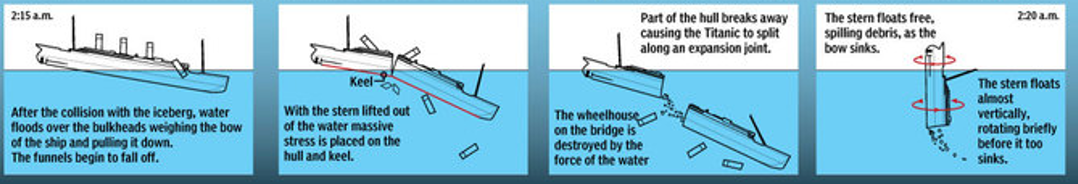

영상으로 확인하기
https://youtu.be/qxHNLVNC5eU

In [9]:
y_data = data_df[['Survived']]

In [10]:
del data_df['Survived']
x_data = data_df.copy()

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [11]:
# 필요없는 feature 삭제
del x_data['Name']
del x_data["PassengerId"]

In [12]:
# Age와 다른값들의 상관분석
age_corr = x_data[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
age_corr.corr()


# Pclass와 상관계수가 가장높아서 Pclass별 평균나이로 결측치 채워줌
# Pclass별 나이평균
x_data.groupby("Pclass")["Age"].mean()

#Pclass별 평균값으로 채워주기
x_data['Age'] = x_data.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.mean()))

In [13]:
# 결측치확인 - 2개의 값이 누락되어있음
x_data[x_data['Embarked'].isnull()]


#이름으로 관련 검색(https://www.encyclopedia-titanica.org/)
#https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

#사우스햄스턴탑승자로 검색완료 채워줌

x_data['Embarked'] = x_data['Embarked'].fillna('S')

In [14]:
# 같은 Ticket을 가진경우 일행으로 판단하고 사람수

Ticket_num = []  # 동일한 티켓번호를 가진사람 수(자신포함) 
Ticket_v_c = x_data.Ticket.value_counts()  #같은티켓번호 count해줌
# value_counts()값의 key값을넣어주고 value값을 가져옴
for i in x_data['Ticket']:
    Ticket_num.append(Ticket_v_c[i])

x_data['Ticket_num'] = Ticket_num

#쓰고 난뒤 Ticket열 삭제
del x_data['Ticket']

In [15]:
# preparing 'Sex' male == 1 female == 2
x_data['Sex'] = x_data['Sex'].replace(['male', 'female'],[1, 2])

In [16]:
with open("deck_df.pkl","rb") as fr:
    data = pickle.load(fr)

In [20]:
x_data['dect'] = data

del x_data['Cabin']

In [21]:
print(y_data)
x_data

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_num,dect
0,3,1,22.00000,1,0,7.2500,S,1,3
1,1,2,38.00000,1,0,71.2833,C,1,3
2,3,2,26.00000,0,0,7.9250,S,1,6
3,1,2,35.00000,1,0,53.1000,S,2,3
4,3,1,35.00000,0,0,8.0500,S,1,6
...,...,...,...,...,...,...,...,...,...
886,2,1,27.00000,0,0,13.0000,S,1,4
887,1,2,19.00000,0,0,30.0000,S,1,2
888,3,2,25.14062,1,2,23.4500,S,2,6
889,1,1,26.00000,0,0,30.0000,C,1,3


<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

<br>

## 4. Train the model

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)